# Econ 8400 Problem Set 1: Work Hours Choices with Static Labor Supply

## Haosi Shen, Spring 2025

# Model Setup
Suppose that individuals have the choice to work $h\in\{0,10,20,30,40\}$ hours per week. Preferences over these discrete alternatives may be described by a parametric utility function:
$$
u(c,h)=\gamma \cdot (\theta^{-1}c^{\theta} -\alpha h)+\epsilon_h
$$
where the state-specific errors $\epsilon_h$ follow a Type-I extreme value (Gumbel) distribution.  Consumption is given by the budget constraint 
$$
c = y+wh-T(wh)
$$
where $y$ is the non-labor income, $T(\cdot)$ is the tax system, and $w$ is the gross hourly wage rate generated by the following log-linear relationship
$$
\ln{w}=\mu_w + \epsilon_w
$$
where the unobserved component of wages $\epsilon_w \sim \mathcal{N}(0,\sigma_w)$.


In [3]:
# Housekeeping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Simulation

Suppose that the parameter values are $\sigma_w = 0.55$, $\mu_w=1$, $\theta=0.3$, $\alpha=0.1$, $\gamma=2$, and that $Y\sim\text{Uniform}(10,100)$.

Suppose also that earnings below 80 per week are not taxed; any
earnings greater than 80 are taxed at the constant marginal tax rate $\tau=0.3$.  Non-labor income is not taxed.
$$T(wh)=\begin{cases}
    0\quad&\text{if }wh<80\\
    \tau\cdot(wh-80)\quad&\text{if }wh\geq80
\end{cases}$$
Define the utility with respect to each work hour choice:
$$U_h=\gamma \cdot (\theta^{-1}c(h)^{\theta} -\alpha h)+\epsilon_h$$

Under these assumptions, simulate a dataset of 1,000 observations.

In [5]:
#================================================================
## ======================== SETUP ===============================
#================================================================

# Parameters
sigma_w = 0.55
mu_w = 1
theta = 0.3
alpha = 0.1
gamma = 2
tau = 0.3
n_individuals = 1000
hours_options = [0, 10, 20, 30, 40]

# Non-labor income Y
Y = np.random.uniform(10, 100, n_individuals)

# Wages
eps_w = np.random.normal(0, sigma_w, n_individuals)
w = np.exp(mu_w + eps_w)


In [6]:
# Helper functions

# Progressive tax system
def compute_tax(earnings):
    return np.where(earnings < 80, 0, tau * (earnings - 80))

# Utility without stochastic Gumbel shock
def utility(c, h):
    return gamma * ((1/theta) * c**theta - alpha * h)


In [7]:
# Work hour choices

choices = []

for i in range(n_individuals):
    utilities = []
    for h in hours_options:
        earnings = w[i] * h
        tax = compute_tax(earnings)
        
        # back up consumption from budget constraint
        c = Y[i] + earnings - tax

        # compute realized utility for each hour choice
        eps_h = np.random.gumbel(0, 1)
        U_h = utility(c, h) + eps_h
        utilities.append(U_h)
        
    # Hours chosen from the finite set to maximize utility
    choice = hours_options[np.argmax(utilities)]
    choices.append(choice)
    

In [8]:
data = pd.DataFrame({
    'NonLaborIncome': Y,
    'Wage': w,
    'HoursWorked': choices
})
data.to_csv('simulated_labor_supply.csv', index=False)
data.head()

,NonLaborIncome,Wage,HoursWorked
0,43.708611,2.997371,30
1,95.564288,1.304162,30
2,75.879455,3.350497,10
3,63.879264,3.803121,20
4,24.041678,3.698343,20


### Plot the distribution of work hours in your simulated dataset. 

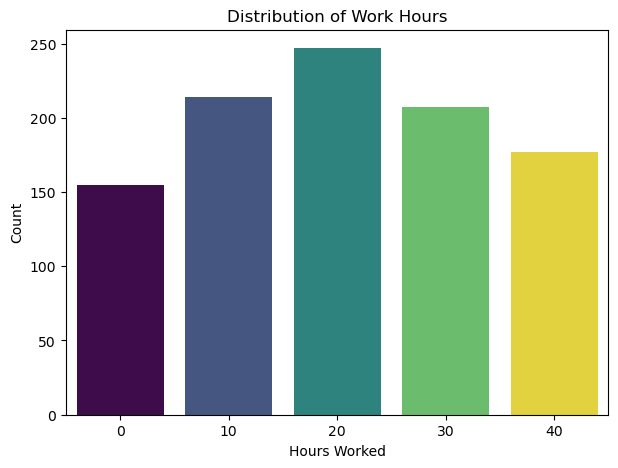

In [21]:
# Distribution of Work Hour Choices
plt.figure(figsize=(7, 5))
sns.countplot(x='HoursWorked', data=data, palette='viridis', hue='HoursWorked', legend=False)
plt.title('Distribution of Work Hours')
plt.xlabel('Hours Worked')
plt.ylabel('Count')
plt.savefig('work_hours_disn.png', dpi=300, bbox_inches='tight')
plt.show()

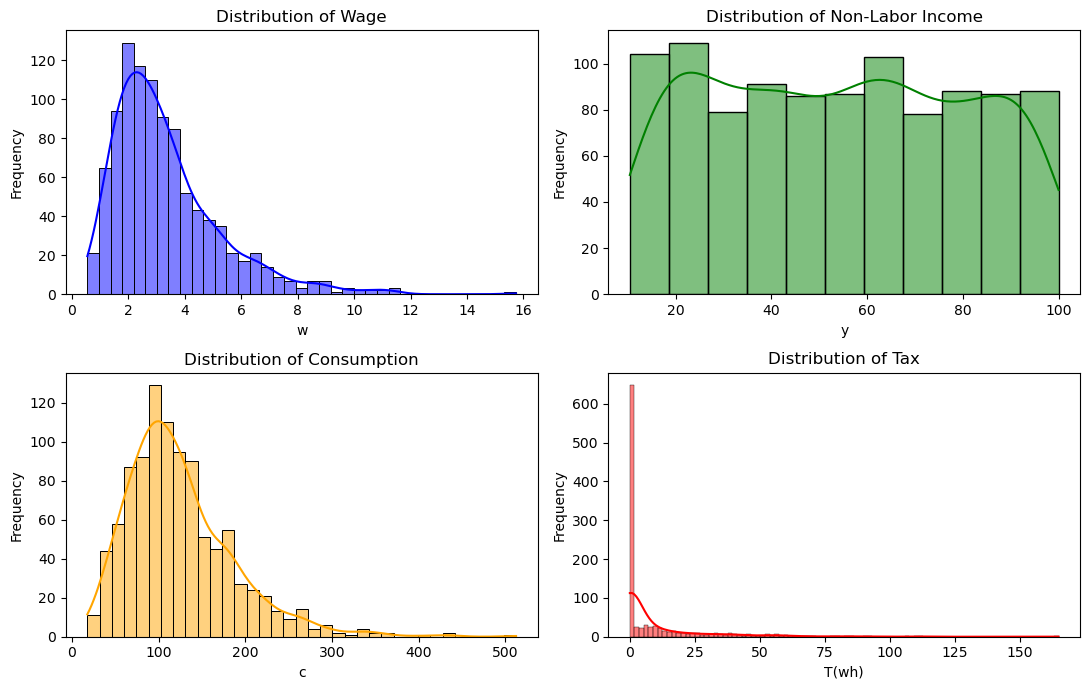

In [23]:
data['Earnings'] = data['Wage'] * data['HoursWorked']
data['Tax'] = compute_tax(data['Earnings'])
data['Consumption'] = data['NonLaborIncome'] + data['Earnings'] - data['Tax']

plt.figure(figsize=(11, 7))

# Distribution of Wage
plt.subplot(2, 2, 1)
sns.histplot(data['Wage'], kde=True, color='blue')
plt.title('Distribution of Wage')
plt.xlabel('w')
plt.ylabel('Frequency')

# Distribution of Non-Labor Income
plt.subplot(2, 2, 2)
sns.histplot(data['NonLaborIncome'], kde=True, color='green')
plt.title('Distribution of Non-Labor Income')
plt.xlabel('y')
plt.ylabel('Frequency')

# Distribution of Consumption
plt.subplot(2, 2, 3)
sns.histplot(data['Consumption'], kde=True, color='orange')
plt.title('Distribution of Consumption')
plt.xlabel('c')
plt.ylabel('Frequency')

# Distribution of Tax
plt.subplot(2, 2, 4)
sns.histplot(data['Tax'], kde=True, color='red')
plt.title('Distribution of Tax')
plt.xlabel('T(wh)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('q1_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


### Assess how the distribution of non-labor income and (offered) wages varies with work hours. 